In [1]:
import pandas as pd
import numpy as np



In [2]:
new_blogs=pd.read_csv('../input/new-blogs/new_blogs.csv')
new_blogs.sample(10)


,art,class
117,وأضاف: “بناءً على ذلك تمّ رفع خطاب في اليوم ال...,news
211,"""الخبرة هي الاسم الذي يصف به كل شخص أخطاءه"" أو...",blog
62,وكانت الحكومة الأردنية قد قدمت اعتذارا للمعلمي...,news
57,"وفي الوقت نفسه، ذكر المصدر أن ""الولايات المتحد...",news
186,وأوضح بوكيلي أن هذا دليل على أن الخير موجود وم...,news
344,الهيئة السعودية للتخصصات الصحية () استكمال...,blog
347,الثقة السعودية.. والهجمة اليسارية الحمقاء ! ...,blog
360,كثير منا سمع عن الأطباق الطائرة وبعضنا شاهدها ...,blog
35,قالت منظمة هيومان رايتس ووتش إن السلطات السعود...,news
199,لفت نظري الأسبوع الماضي النشاط السياسي الواسع ...,blog


In [3]:
new_blogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   art     401 non-null    object
 1   class   401 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


<AxesSubplot:xlabel='class', ylabel='art'>

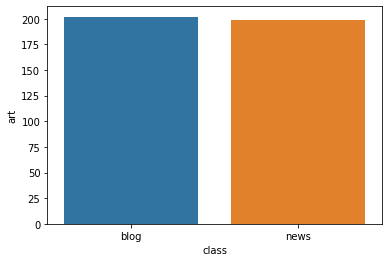

In [4]:
#checking if the dataset is balanced 
import seaborn as sns
N_B=new_blogs.groupby(by="class").count()["art"]
sns.barplot(x=N_B.index,y=N_B)


In [5]:
#importing the wordstopper for tokenizing 
#removing word stoppers
from nltk.tokenize import word_tokenize
file1 = open('../input/stopwords/stopwordsarabic.txt', 'r', encoding='utf-8') 
stopwords_arabic = file1.read().splitlines()
def removeStopWords(text,stopwords):
    text_tokens = word_tokenize(text)
    return " ".join([word for word in text_tokens if not word in stopwords])

In [6]:
#importing the punctionations for tokenizing 
from nltk.tokenize import RegexpTokenizer
def removePunctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    return " ".join(tokenizer.tokenize(text))

In [7]:
#cleaning data 
def preprocessText(text,stopwords,wordcloud=False):
    noStop=removeStopWords(text,stopwords)
    noPunctuation=removePunctuation(noStop)
    if wordcloud:
        text=arabic_reshaper.reshape(noPunctuation)
        text=get_display(text)
        return text
    return noPunctuation


In [8]:
#We will be using TF-IDF since it in most cases it yields better performance!
from sklearn.feature_extraction.text import TfidfVectorizer
#Clean the articles
new_blogs["artClean"]=new_blogs["art"].apply(lambda s: preprocessText(s,stopwords_arabic))



In [9]:
#printing dataset after cleaning
new_blogs.sample(30)

,art,class,artClean
328,الأمريكي لا يعرف الوفاء بالنسبة لي لم أستط...,blog,الأمريكي يعرف الوفاء بالنسبة لي أستطع فهم الرئ...
15,من ناحية أخرى، أشارت صحف سعودية إلى أن المملكة...,news,ناحية أخرى أشارت صحف سعودية المملكة تسعى توحيد...
287,متمسكون بمبادئنا وسيادتنا وكرامة شعبنا التي اس...,blog,متمسكون بمبادئنا وسيادتنا وكرامة شعبنا استلهمن...
203,الجولة الأوروبية لولي العهد، تفتح آفاقاً جديدة...,blog,الجولة الأوروبية لولي العهد تفتح آفاقا جديدة ل...
172,ألف مصطفى محمود كتاباً، منها الكتب العلمية وا...,news,مصطفى محمود كتابا الكتب العلمية والدينية والفل...
317,قل للشامتين؛ سلاماً • وأنت تتصفح أوراقهم ا...,blog,قل للشامتين سلاما وأنت تتصفح أوراقهم المبعثرة ...
395,التصعيد ما زال مستمرا في الحرب الدائرة بين روس...,blog,التصعيد زال مستمرا الحرب الدائرة روسيا وأوكران...
57,"وفي الوقت نفسه، ذكر المصدر أن ""الولايات المتحد...",news,نفسه ذكر المصدر الولايات المتحدة طلبت كلمة لمم...
268,انفض صيف الباحة بعد أن شهدت محافظات سراة الباح...,blog,انفض صيف الباحة شهدت محافظات سراة الباحة إقبال...
206,الأزمة التي نتجت عن الهجوم الروسي على أوكرانيا...,blog,الأزمة نتجت الهجوم الروسي أوكرانيا أدت الهلع و...


In [10]:
#Vectorize the articles
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(new_blogs["artClean"])
y=new_blogs["class"]

In [11]:
print(X)

  (0, 1514)	0.12267385697843074
  (0, 10467)	0.09569402994061854
  (0, 19554)	0.12267385697843074
  (0, 18119)	0.11478276343189929
  (0, 1913)	0.12267385697843074
  (0, 17258)	0.12267385697843074
  (0, 8747)	0.12267385697843074
  (0, 943)	0.07786133426237576
  (0, 13011)	0.11478276343189929
  (0, 8920)	0.08220411642171245
  (0, 19105)	0.10484116130018793
  (0, 4448)	0.09569402994061854
  (0, 5161)	0.10918394345952465
  (0, 13334)	0.08220411642171245
  (0, 4052)	0.0669701861847555
  (0, 18484)	0.12267385697843074
  (0, 11054)	0.12267385697843074
  (0, 1192)	0.12267385697843074
  (0, 14544)	0.09569402994061854
  (0, 18620)	0.0834601542347504
  (0, 25134)	0.12267385697843074
  (0, 12000)	0.11478276343189929
  (0, 12581)	0.22956552686379858
  (0, 727)	0.08780293639408712
  (0, 18317)	0.07786133426237576
  :	:
  (400, 4437)	0.03161735671971589
  (400, 3602)	0.04401898667382068
  (400, 3992)	0.1366261056382647
  (400, 3672)	0.03161735671971589
  (400, 6435)	0.03521083072880655
  (400, 19356)

In [12]:
print(y)

0      news
1      news
2      news
3      news
4      news
       ... 
396    blog
397    blog
398    blog
399    blog
400    blog
Name: class, Length: 401, dtype: object


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#logistic regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
Y_pred=clf.predict(X_test)
print(f"testing score->{clf.score(X_test,y_test)}")

testing score->0.9382716049382716


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8 , weights='distance')

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [17]:
#getting prediction accuracy score results of the kNN model
knn.score(X_test,y_test)

0.9135802469135802

In [18]:
from sklearn.ensemble import RandomForestClassifier
R_F = RandomForestClassifier(n_estimators=42)
R_F.fit(X_train, y_train)

RandomForestClassifier(n_estimators=42)

In [19]:
R_F.score(X_test, y_test)

0.9876543209876543

In [20]:
y_predicted = R_F.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0],
       [ 1, 44]])

Text(33.0, 0.5, 'Truth')

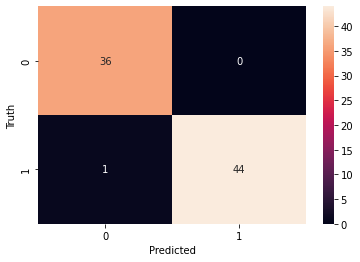

In [21]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure()
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale



In [23]:
sgdc = SGDClassifier(max_iter=1000, tol=1e-3)
print(sgdc)

sgdc.fit(X_train, y_train)

SGDClassifier()


SGDClassifier()

In [25]:
score = sgdc.score(X_test, y_test)
print("Test score: ", score) 

Test score:  0.9876543209876543


In [26]:
cr = classification_report(y_test, y_predicted)
print(cr)

              precision    recall  f1-score   support

        blog       0.97      1.00      0.99        36
        news       1.00      0.98      0.99        45

    accuracy                           0.99        81
   macro avg       0.99      0.99      0.99        81
weighted avg       0.99      0.99      0.99        81



In [27]:
testdata=pd.read_csv('../input/testdata/test.csv')
testdata.sample(10)

,art
8,دافعت الحكومة المصرية عن أدائها الاقتصادي خلال...
61,أثارت تصريحات المهندس مصطفى الشيمي، رئيس مجلس ...
68,اشتكى ذوو مُسن متقاعد من القوات الجوية عن عمر ...
31,بلغ التمويل القطري للإرهاب درجة عالية جدًا، حي...
18,وتحدث أنصار الفتاة عن كونها معها كامل الحق بأن...
66,وقال المتحدث الرسمي بالمجمع فيصل السريحي إن ال...
10,"وفي الوقت نفسه، ذكر المصدر أن ""الولايات المتحد..."
67,وأضاف السريحي أن المريضة مازالت تحت الملاحظة ا...
15,وكانت الحكومة الأردنية قد قدمت اعتذارا للمعلمي...
0,اعتبرت نقابة المهن التمثيلية المصرية مشاركة كل...


In [29]:
#We will be using TF-IDF since it in most cases it yields better performance!
from sklearn.feature_extraction.text import TfidfVectorizer
#Clean the articles
testdata["artCleanT"]=testdata["art"].apply(lambda s: preprocessText(s,stopwords_arabic))


In [30]:
testdata.sample(30)

,art,artCleanT
48,وقد تمّ استخدام حبّة البركة في علاج عدّة أمراض...,تم استخدام حب ة البركة علاج عد ة أمراض كالصداع...
81,لو حسب المدخن كل ما أنفقه في حياته على عادة ال...,المدخن أنفقه حياته عادة التدخين ثمن السجائر ال...
29,بأسلوب ساخر، هنأ أحمد الميسري، وزير الداخلية ف...,بأسلوب ساخر هنأ أحمد الميسري وزير الداخلية حكو...
12,قال المرشد الأعلى للجمهورية الإسلامية آية الله...,المرشد الأعلى للجمهورية الإسلامية آية الله خام...
51,تساعد حبة البركة على معالجة التهاب الحلق وتورم...,تساعد حبة البركة معالجة التهاب الحلق وتورم الل...
71,لم يقتصر الغلاء في مناطق النظام على المواد الغ...,يقتصر الغلاء مناطق النظام المواد الغذائية تخطى...
36,يتمثل دور المخاط الأساسي في الترطيب والحماية ب...,يتمثل دور المخاط الأساسي الترطيب والحماية بصور...
43,هذه الاحصائيات والارقام تجعلنا نسلط الضوء على ...,الاحصائيات والارقام تجعلنا نسلط الضوء المرض وا...
60,وأضاف أن هذا الجهاز يقوم بإعطاء اشارات سمعية ل...,وأضاف الجهاز يقوم بإعطاء اشارات سمعية لتحديد ت...
28,فى المقابل يعتقد آخرون أن القرار انعكس سلباً ع...,المقابل يعتقد آخرون القرار انعكس سلبا قطاعات ا...


In [33]:
#Vectorize the articles
vectorizer = TfidfVectorizer()
XT = vectorizer.fit_transform(testdata["artCleanT"])
yT=testdata

In [34]:
print(XT)

  (0, 2787)	0.10390302946685465
  (0, 1867)	0.10390302946685465
  (0, 1340)	0.09501067173195442
  (0, 2092)	0.10390302946685465
  (0, 898)	0.10390302946685465
  (0, 2817)	0.1418334560850115
  (0, 2458)	0.10390302946685465
  (0, 2467)	0.10390302946685465
  (0, 2891)	0.10390302946685465
  (0, 84)	0.08380762590669198
  (0, 711)	0.09501067173195442
  (0, 430)	0.07980908577740599
  (0, 3338)	0.10390302946685465
  (0, 1222)	0.08380762590669198
  (0, 757)	0.10390302946685465
  (0, 234)	0.10390302946685465
  (0, 3611)	0.10390302946685465
  (0, 1771)	0.09501067173195442
  (0, 337)	0.10390302946685465
  (0, 2313)	0.10390302946685465
  (0, 2903)	0.15961817155481198
  (0, 3140)	0.10390302946685465
  (0, 172)	0.10390302946685465
  (0, 1112)	0.10390302946685465
  (0, 2551)	0.10390302946685465
  :	:
  (82, 736)	0.1839274155325708
  (82, 1763)	0.1839274155325708
  (82, 2007)	0.1839274155325708
  (82, 1748)	0.1839274155325708
  (82, 950)	0.1839274155325708
  (82, 2234)	0.1839274155325708
  (82, 409)	0.

In [37]:
from sklearn.model_selection import train_test_split
XT_train, XT_test, yT_train, yT_test = train_test_split(XT, yT, test_size=0.2, random_state=42)

In [41]:
#logistic regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=42)
clf.fit(XT_train,yT_train)
YT_pred=clf.predict(XT_test)
print(f"testing score->{clf.score(XT_testوYT_pred)}")

ValueError: y should be a 1d array, got an array of shape (66, 2) instead.